# Data analysis for the 2nd exps of UIST 2020

## Loading library and data

In [1]:
library(plyr)
library(ez)
library(nlme)
library(multcomp)
library(nortest) # for Kolmogorov-Smirnov test

library(ggpubr)
library(grid)
library(gridExtra)

source("helper_functions.R")
source("friedman.R")

options(repr.plot.width=7, repr.plot.height=2.5)

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser

Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:plyr’:

    mutate



In [2]:
# read the data
mydata <- read.csv("Data_exp2.csv")

# create a table with aggregated data
mydata_agg = aggregate(mydata,
                by = list(mydata$roomT, mydata$condition, mydata$id),
                FUN = mean)
mydata_agg[1:3] <- list(NULL)

# create a table with aggregated data by condition
mydata_agg2 = aggregate(mydata,
                by = list(mydata$condition, mydata$id),
                FUN = mean)
mydata_agg2[1:2] <- list(NULL)
mydata_agg2[3] <- list(NULL)

mydata_agg2$id <- as.factor(mydata_agg2$id)
mydata_agg2$condition <- as.factor(mydata_agg2$condition)

# define factors in both tables
mydata$id <- as.factor(mydata$id)
mydata$condition <- as.factor(mydata$condition)
mydata$roomT <- as.factor(mydata$roomT)

mydata_agg$id <- as.factor(mydata_agg$id)
mydata_agg$condition <- as.factor(mydata_agg$condition)
mydata_agg$roomT <- as.factor(mydata_agg$roomT)

mydata_agg2$id <- as.factor(mydata_agg2$id)
mydata_agg2$condition <- as.factor(mydata_agg2$condition)

In [3]:
str(mydata)

'data.frame':	288 obs. of  8 variables:
 $ id              : Factor w/ 12 levels "1","2","3","4",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ condition       : Factor w/ 3 levels "0","1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ roomT           : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 2 2 2 2 ...
 $ TCT             : num  38720 35336 41049 35164 32416 ...
 $ nb_warning      : int  1 10 0 2 1 2 2 0 1 3 ...
 $ nb_teleportation: int  2 2 2 2 2 3 2 3 3 5 ...
 $ walking         : num  18.05 26.26 19.54 14.86 8.51 ...
 $ rot             : num  2357 2343 2099 2205 1946 ...


In [4]:
head(mydata)

id condition roomT TCT     nb_warning nb_teleportation walking   rot     
1 5  1         0     38720.4  1         2                18.053516 2357.405
2 5  1         0     35336.5 10         2                26.258503 2342.783
3 5  1         0     41048.8  0         2                19.541346 2098.688
4 5  1         0     35163.9  2         2                14.855635 2205.154
5 5  1         1     32416.1  1         2                 8.507107 1945.900
6 5  1         1     40522.8  2         3                16.272792 2168.623

In [5]:
str(mydata_agg)

'data.frame':	72 obs. of  8 variables:
 $ id              : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ condition       : Factor w/ 3 levels "0","1","2": 1 1 2 2 3 3 1 1 2 2 ...
 $ roomT           : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 1 2 ...
 $ TCT             : num  91027 72210 64363 49418 48000 ...
 $ nb_warning      : num  0.5 0.5 1.75 0.5 0 1 1.25 2.75 0 0.25 ...
 $ nb_teleportation: num  20.75 17.5 3.75 6.5 2.25 ...
 $ walking         : num  12.43 2.77 17.31 13.44 16.39 ...
 $ rot             : num  3977 3353 3177 2649 2829 ...


In [6]:
head(mydata_agg)

id condition roomT TCT      nb_warning nb_teleportation walking  rot     
1 1  0         0     91026.90 0.50       20.75            12.42855 3976.551
2 1  0         1     72210.35 0.50       17.50             2.77500 3353.244
3 1  1         0     64363.20 1.75        3.75            17.31263 3176.875
4 1  1         1     49417.97 0.50        6.50            13.43713 2648.587
5 1  2         0     47999.68 0.00        2.25            16.39142 2828.762
6 1  2         1     57217.53 1.00        3.75            14.91391 2675.791

---

## Analize of TCT

###  TCT: Checking the distribution

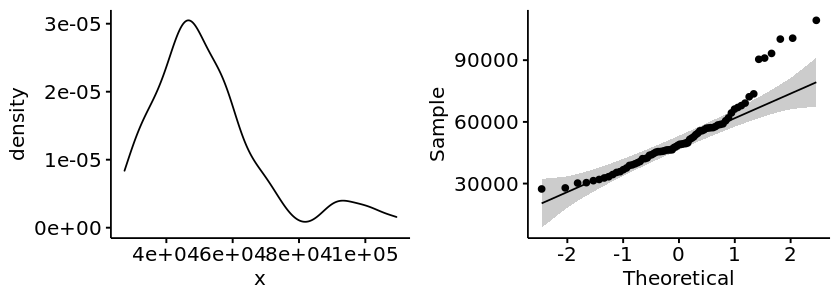

In [7]:
ggdensity(mydata_agg$TCT) -> p1
ggqqplot(mydata_agg$TCT) -> p2
grid.arrange(p1, p2, ncol = 2)

In [8]:
shapiro.test(mydata_agg$TCT)


	Shapiro-Wilk normality test

data:  mydata_agg$TCT
W = 0.887, p-value = 9.586e-06


Shapriro test is significant : the data is different from the normal distriubtion => it is not normally distributed

#### Do an log transform and check the lognormal distribution

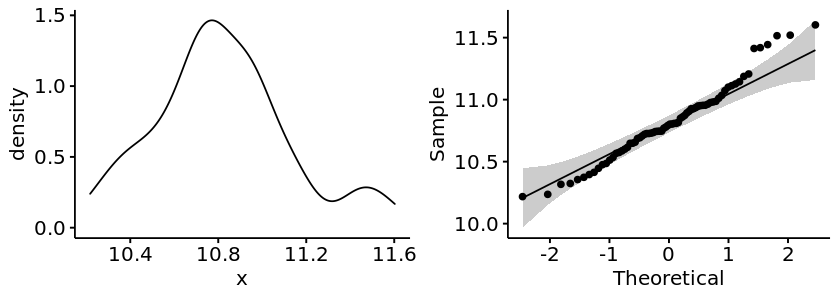

In [9]:
mydata_agg$TCT_log <- log(mydata_agg$TCT)

ggdensity(mydata_agg$TCT_log) -> p1
ggqqplot(mydata_agg$TCT_log) -> p2
grid.arrange(p1, p2, ncol = 2)

In [10]:
lillie.test(mydata_agg$TCT_log)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  mydata_agg$TCT_log
D = 0.082685, p-value = 0.2585


Kolmogorov-Smirnov test is not significant : we can assume that the data follow a lognormal distribution.  
We will analyze the TCT with a lognormal distribution

### TCT: descriptive stats and plots of the aggregated data

In [11]:
TCT_summary_agg1 <- summarySEwithin(mydata_agg, 
                                   measurevar="TCT_log", 
                                   withinvars=c("condition", "roomT"), 
                                   idvar="id")

Since we convert the data with a log transform, we need to convert them back to get the means and CIs for plots.

In [12]:
TCT_summary_agg1$TCT <- exp(TCT_summary_agg1$TCT_log)
TCT_summary_agg1$cup <- exp(TCT_summary_agg1$TCT_log + TCT_summary_agg1$ci)
TCT_summary_agg1$clo <- exp(TCT_summary_agg1$TCT_log - TCT_summary_agg1$ci)

print(TCT_summary_agg1)

  condition roomT  N  TCT_log TCT_log_norm        sd         se        ci
1         0     0 12 11.06690     11.06690 0.2043355 0.05898656 0.1298286
2         0     1 12 10.98520     10.98520 0.2256572 0.06514161 0.1433757
3         1     0 12 10.68636     10.68636 0.1994109 0.05756497 0.1266996
4         1     1 12 10.75719     10.75719 0.2013127 0.05811397 0.1279080
5         2     0 12 10.59165     10.59165 0.2664991 0.07693166 0.1693254
6         2     1 12 10.81721     10.81721 0.2214876 0.06393797 0.1407265
       TCT      cup      clo
1 64016.74 72891.58 56222.45
2 58994.67 68089.48 51114.66
3 43754.87 49665.10 38547.96
4 46966.59 53375.11 41327.52
5 39801.04 47144.55 33601.39
6 49871.84 57407.97 43325.01


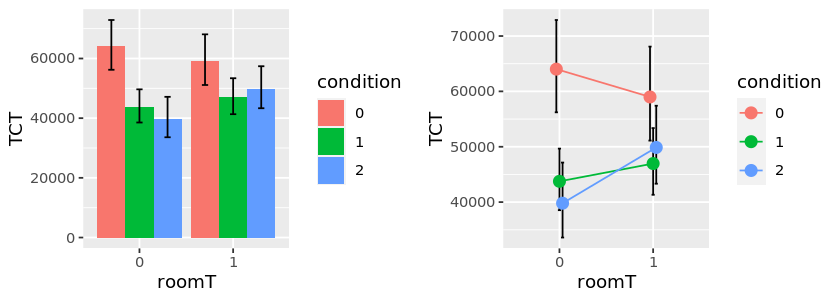

In [13]:
ggplot(TCT_summary_agg1, aes(x=roomT, y=TCT, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=clo, ymax=cup),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(TCT_summary_agg1, aes(x=roomT, y=TCT, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=clo, ymax=cup), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

### TCT: Running a Two-way repeated measure Anova

In [14]:
aov.ez1 <- ezANOVA(data=mydata_agg,dv=.(TCT_log), wid=.(id), within =.(condition,roomT), detailed=TRUE)
aov.ez1

$ANOVA
           Effect DFn DFd          SSn       SSd            F            p
1     (Intercept)   1  11 8.425191e+03 2.0521739 45160.454428 3.142961e-21
2       condition   2  22 1.570599e+00 1.5598449    11.075840 4.701429e-04
3           roomT   1  11 9.219187e-02 0.4755726     2.132399 1.721794e-01
4 condition:roomT   2  22 2.832332e-01 0.6508207     4.787133 1.879246e-02
  p<.05        ges
1     * 0.99943791
2     * 0.24894540
3       0.01908496
4     * 0.05640247

$`Mauchly's Test for Sphericity`
           Effect         W         p p<.05
2       condition 0.8685381 0.4942473      
4 condition:roomT 0.6947582 0.1618708      

$`Sphericity Corrections`
           Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF]
2       condition 0.8838123 0.0008671476         * 1.0404417 0.0004701429
4 condition:roomT 0.7661416 0.0299578846         * 0.8654356 0.0245603339
  p[HF]<.05
2         *
4         *

Mauchly's Test results are not significant (condition: p = 0.49, condition X roomT: p = 0.16),  
indicating that sphericity is not violated and that an uncorrected test can be used.

Main effect of condition (F(2,22) = 11.08, p = 0.0005)  
Interaction effect of condition X roomT (F(2,22) = 4.79, p = 0.019) 

### TCT: post-hoc analysis

#### Post-hoc for the main effect of condition

In [15]:
pairwise.t.test(mydata_agg$TCT_log,mydata_agg$condition,paired=TRUE,p.adjust.method="bonferroni")


	Pairwise comparisons using paired t tests 

data:  mydata_agg$TCT_log and mydata_agg$condition 

  0       1      
1 0.00017 -      
2 0.00152 1.00000

P value adjustment method: bonferroni 

C0 is significantly different than C1 (p = 0.0002)  
C0 is significantly different than C2 (p = 0.0015)  
No differences between C1 and C2

#### Post-hoc for the interaction effect

In [16]:
pairwise.t.test(mydata_agg$TCT_log,interaction(mydata_agg$condition,mydata_agg$roomT),paired=TRUE,p.adjust.method="bonferroni")


	Pairwise comparisons using paired t tests 

data:  mydata_agg$TCT_log and interaction(mydata_agg$condition, mydata_agg$roomT) 

    0.0   1.0   2.0   0.1   1.1  
1.0 0.030 -     -     -     -    
2.0 0.021 1.000 -     -     -    
0.1 1.000 0.257 0.069 -     -    
1.1 0.043 1.000 1.000 0.201 -    
2.1 0.209 1.000 0.586 1.000 1.000

P value adjustment method: bonferroni 

In roomT = 0:   
C0 is significantly different than C1 (p = 0.006)  
C0 is significantly different than C2 (p = 0.0042)  
No differences between C1 and C2

In roomT = 1:    
No differences between C0, C1 and C2, between C1 and C2.

A significant difference between C0 in roomT=0 and C1 in roomT=1 (p=0.043) => not really interesting!

---

# Analize of NB_Warnings

### nb_warnings: checking the distribution

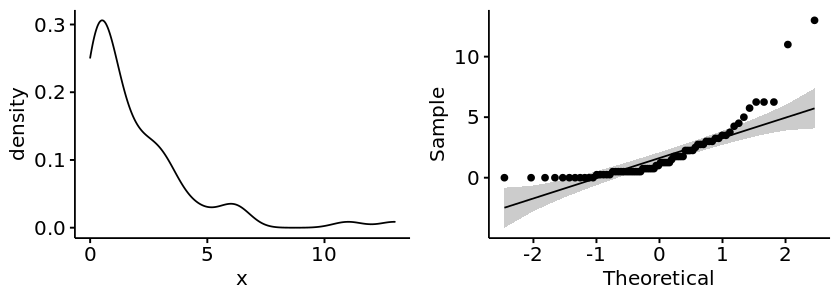

In [17]:
ggdensity(mydata_agg$nb_warning) -> p1
ggqqplot(mydata_agg$nb_warning) -> p2
grid.arrange(p1, p2, ncol = 2)

In [18]:
shapiro.test(mydata_agg$nb_warning)


	Shapiro-Wilk normality test

data:  mydata_agg$nb_warning
W = 0.73616, p-value = 4.643e-10


Shapriro test is significant : the data is different from the normal distriubtion => it is not normally distributed

#### Do an log transform and check the lognormal distribution

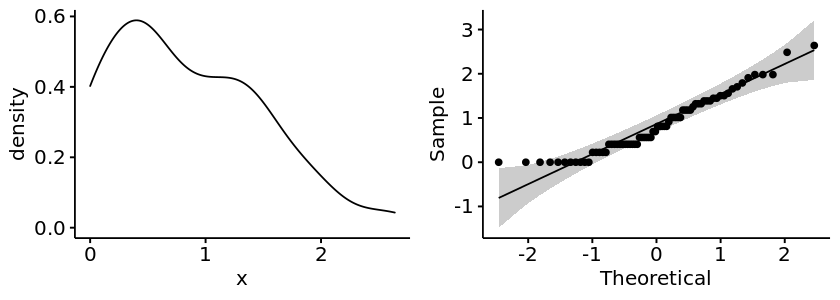

In [19]:
mydata_agg$nb_warning_log <- log(mydata_agg$nb_warning+1)

ggdensity(mydata_agg$nb_warning_log) -> p1
ggqqplot(mydata_agg$nb_warning_log) -> p2
grid.arrange(p1, p2, ncol = 2)

In [20]:
lillie.test(mydata_agg$nb_warning_log)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  mydata_agg$nb_warning_log
D = 0.13807, p-value = 0.001655


Kolmogorov-Smirnov test is significant : the data is different from the log normal distriubtion => it is not log normally distributed  
We will analyze the nb_warning with non-parametrics tests

### nb_warnings: descriptive stats and plots of the data aggregated by condition

In [21]:
str(mydata_agg2)

'data.frame':	36 obs. of  7 variables:
 $ id              : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ condition       : Factor w/ 3 levels "0","1","2": 1 2 3 1 2 3 1 2 3 1 ...
 $ TCT             : num  81619 56891 52609 47714 42150 ...
 $ nb_warning      : num  0.5 1.125 0.5 2 0.125 ...
 $ nb_teleportation: num  19.12 5.12 3 6.5 2.62 ...
 $ walking         : num  7.6 15.4 15.7 11.5 13.9 ...
 $ rot             : num  3665 2913 2752 3066 3100 ...


In [22]:
head(mydata_agg2)

id condition TCT      nb_warning nb_teleportation walking   rot     
1 1  0         81618.62 0.500      19.125            7.601777 3664.898
2 1  1         56890.59 1.125       5.125           15.374879 2912.731
3 1  2         52608.60 0.500       3.000           15.652665 2752.276
4 2  0         47713.90 2.000       6.500           11.456954 3066.282
5 2  1         42150.34 0.125       2.625           13.917094 3099.695
6 2  2         50348.95 1.125       2.000           15.980065 3487.392

  condition  N nb_warning nb_warning_norm       sd        se        ci
1         0 12  3.3750000       3.3750000 2.469399 0.7128541 1.5689814
2         1 12  1.5000000       1.5000000 1.255072 0.3623080 0.7974346
3         2 12  0.8958333       0.8958333 1.638830 0.4730895 1.0412629


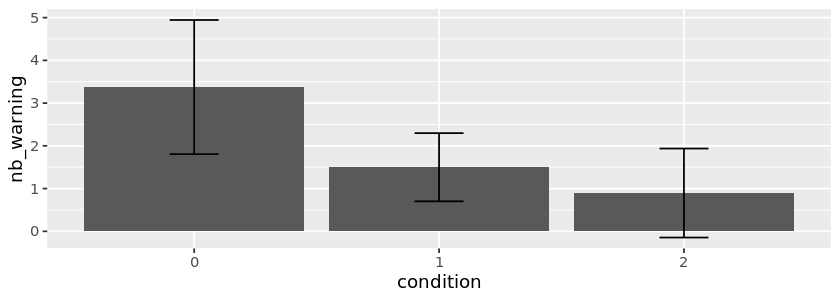

In [23]:
summary_agg3 <- summarySEwithin(mydata_agg2, measurevar="nb_warning", withinvars=c("condition"), idvar="id")
print(summary_agg3)

ggplot(summary_agg3, aes(x=condition, y=nb_warning)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=nb_warning-ci, ymax=nb_warning+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9))

### nb_warnings: Running a Friedman test on data aggregated by condition

In [24]:
friedman.test(nb_warning ~ condition | id, data=mydata_agg2 )


	Friedman rank sum test

data:  nb_warning and condition and id
Friedman chi-squared = 11.511, df = 2, p-value = 0.003165


There is a significant main effect of condition (chi-squared = 11.511, p = 0.0032)

#### Post-hoc analysis

Loading required package: coin
Loading required package: colorspace


$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_warning by condition (0, 1, 2) 
	 stratified by id
maxT = 3.3731, p-value = 0.002128
alternative hypothesis: two.sided


$PostHoc.Test
                 
1 - 0 0.111504782
2 - 0 0.002152189
2 - 1 0.356590052


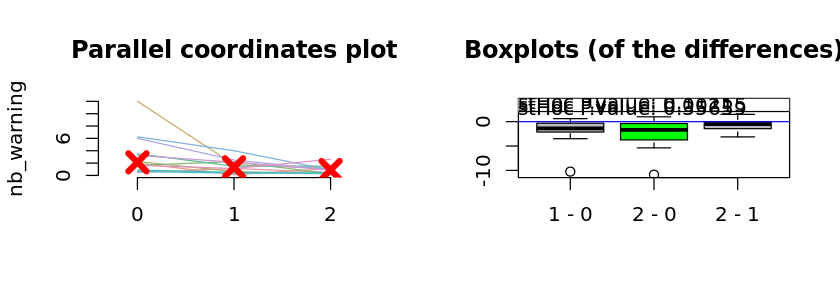

In [25]:
friedman.test.with.post.hoc(nb_warning ~ condition | id, data=mydata_agg2)

C0 is significantly different than C2 (p = 0.0021)  
No other effects.

### nb_warnings: descriptive stats and plots of the whole data

In [26]:
summary_agg2 <- summarySEwithin(mydata_agg, measurevar="nb_warning", withinvars=c("condition", "roomT"), idvar="id")
print(summary_agg2)

  condition roomT  N nb_warning nb_warning_norm       sd        se        ci
1         0     0 12  3.2916667       3.2916667 1.951285 0.5632874 1.2397873
2         0     1 12  3.4583333       3.4583333 2.616225 0.7552391 1.6622701
3         1     0 12  1.3541667       1.3541667 1.451140 0.4189081 0.9220105
4         1     1 12  1.6458333       1.6458333 1.565893 0.4520343 0.9949208
5         2     0 12  0.3333333       0.3333333 1.505776 0.4346801 0.9567244
6         2     1 12  1.4583333       1.4583333 1.854135 0.5352426 1.1780610


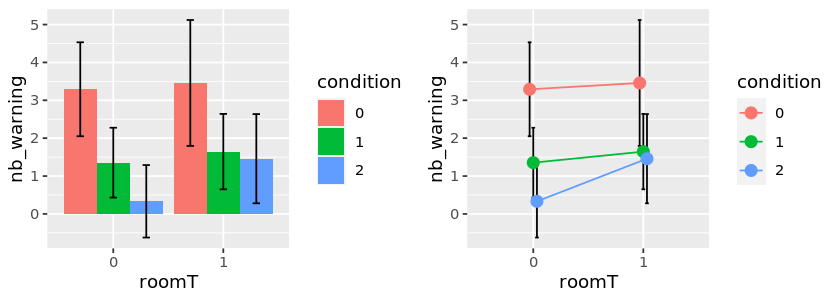

In [27]:
ggplot(summary_agg2, aes(x=roomT, y=nb_warning, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=nb_warning-ci, ymax=nb_warning+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(summary_agg2, aes(x=roomT, y=nb_warning, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=nb_warning-ci, ymax=nb_warning+ci), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

### nb_warnings: Running a Friedman test on data separated by RoomT

I am not sure about the way to compute confidence intervals. They should not go under 0.  
We probaly have to compute asymetric confidence intervals.

In [28]:
roomT0 <- subset(mydata_agg, roomT == "0")
roomT1 <- subset(mydata_agg, roomT == "1")

friedman.test(nb_warning ~ condition | id, data=roomT0 )
friedman.test(nb_warning ~ condition | id, data=roomT1 )


	Friedman rank sum test

data:  nb_warning and condition and id
Friedman chi-squared = 14.279, df = 2, p-value = 0.0007931



	Friedman rank sum test

data:  nb_warning and condition and id
Friedman chi-squared = 4.9545, df = 2, p-value = 0.08397


In roomT = 0: there is a significant effect of condition (chi-squared = 14.279, p = 0.0008).   
In roomT = 1: there is no effect of condition.  
=> there is probalby an interaction effect.

#### Post-hoc analysis

$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_warning by condition (0, 1, 2) 
	 stratified by id
maxT = 3.7741, p-value = 0.0004653
alternative hypothesis: two.sided


$PostHoc.Test
                  
1 - 0 0.1007191955
2 - 0 0.0004639353
2 - 1 0.1956449796


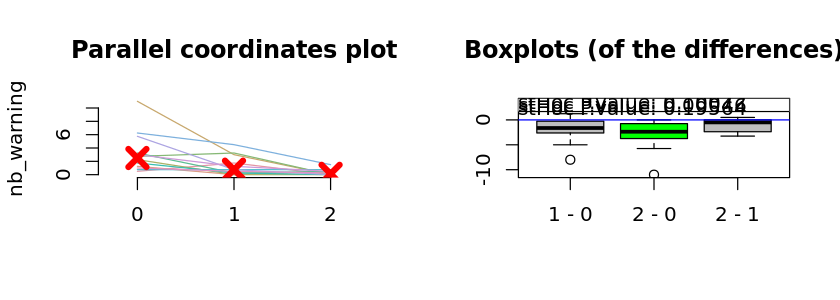

In [29]:
friedman.test.with.post.hoc(nb_warning ~ condition | id, data=roomT0)

In roomT = 0: C0 is significantly different than C2 (p = 0.0021). No other effects.

### NB_Warning: Analyze with log transform and parametric tests

In [30]:
summary_agg8 <- summarySEwithin(mydata_agg, 
                                   measurevar="nb_warning_log", 
                                   withinvars=c("condition", "roomT"), 
                                   idvar="id")

In [31]:
summary_agg8$nb_warning <- exp(summary_agg8$nb_warning_log)
summary_agg8$cup <- exp(summary_agg8$nb_warning_log + summary_agg8$ci)
summary_agg8$clo <- exp(summary_agg8$nb_warning_log - summary_agg8$ci)

print(summary_agg8)

  condition roomT  N nb_warning_log nb_warning_log_norm        sd        se
1         0     0 12      1.2658195           1.2658195 0.3992607 0.1152566
2         0     1 12      1.2132286           1.2132286 0.5356591 0.1546315
3         1     0 12      0.6942897           0.6942897 0.5526586 0.1595388
4         1     1 12      0.8414589           0.8414589 0.4319965 0.1247066
5         2     0 12      0.2429538           0.2429538 0.4436008 0.1280565
6         2     1 12      0.7786789           0.7786789 0.5501999 0.1588290
         ci nb_warning      cup      clo
1 0.2536781   3.545997 4.569929 2.751487
2 0.3403416   3.364329 4.728321 2.393812
3 0.3511425   2.002286 2.844628 1.409376
4 0.2744775   2.319749 3.052425 1.762937
5 0.2818505   1.275010 1.690128 0.961850
6 0.3495804   2.178592 3.090272 1.535872


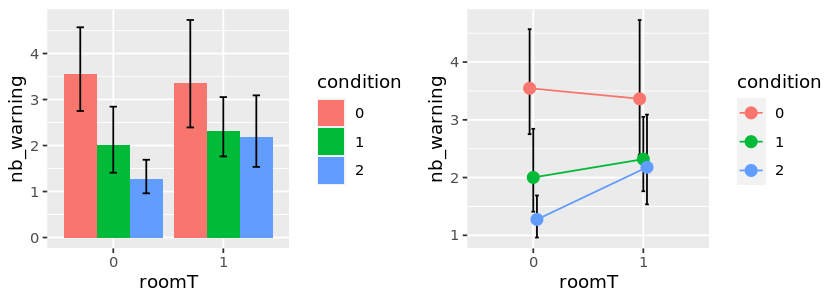

In [32]:
ggplot(summary_agg8, aes(x=roomT, y=nb_warning, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=clo, ymax=cup),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(summary_agg8, aes(x=roomT, y=nb_warning, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=clo, ymax=cup), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

In [33]:
aov.ez4 <- ezANOVA(data=mydata_agg,dv=.(nb_warning_log), wid=.(id), within =.(condition,roomT), detailed=TRUE)
aov.ez4

$ANOVA
           Effect DFn DFd        SSn      SSd         F            p p<.05
1     (Intercept)   1  11 50.7312408 8.666619 64.390009 6.346170e-06     *
2       condition   2  22  6.5563783 6.800425 10.605243 5.958938e-04     *
3           roomT   1  11  0.7945647 3.277323  2.666875 1.307260e-01      
4 condition:roomT   2  22  1.0739908 3.102947  3.807316 3.802591e-02     *
         ges
1 0.69898390
2 0.23082838
3 0.03509270
4 0.04685557

$`Mauchly's Test for Sphericity`
           Effect         W         p p<.05
2       condition 0.8972103 0.5813949      
4 condition:roomT 0.9594519 0.8130479      

$`Sphericity Corrections`
           Effect       GGe        p[GG] p[GG]<.05      HFe        p[HF]
2       condition 0.9067912 0.0009538688         * 1.075664 0.0005958938
4 condition:roomT 0.9610320 0.0401694254         * 1.160218 0.0380259108
  p[HF]<.05
2         *
4         *

In [34]:
pairwise.t.test(mydata_agg$nb_warning_log,mydata_agg$condition,paired=TRUE,p.adjust.method="bonferroni")


	Pairwise comparisons using paired t tests 

data:  mydata_agg$nb_warning_log and mydata_agg$condition 

  0      1     
1 0.0061 -     
2 0.0003 0.1856

P value adjustment method: bonferroni 

In [35]:
pairwise.t.test(mydata_agg$nb_warning_log,interaction(mydata_agg$condition,mydata_agg$roomT),paired=TRUE,p.adjust.method="bonferroni")


	Pairwise comparisons using paired t tests 

data:  mydata_agg$nb_warning_log and interaction(mydata_agg$condition, mydata_agg$roomT) 

    0.0    1.0    2.0    0.1    1.1   
1.0 0.1216 -      -      -      -     
2.0 0.0046 0.3697 -      -      -     
0.1 1.0000 0.8731 0.0192 -      -     
1.1 0.4495 1.0000 0.0560 1.0000 -     
2.1 0.7372 1.0000 0.2281 1.0000 1.0000

P value adjustment method: bonferroni 

---

# Analize of NB_teleportation

### nb_teleportation: checking the distribution

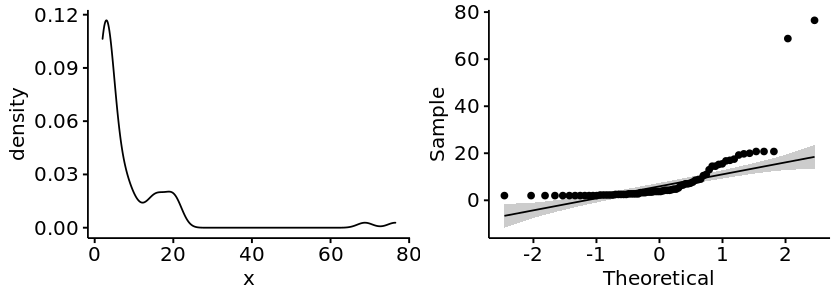

In [36]:
ggdensity(mydata_agg$nb_teleportation) -> p1
ggqqplot(mydata_agg$nb_teleportation) -> p2
grid.arrange(p1, p2, ncol = 2)

In [37]:
shapiro.test(mydata_agg$nb_teleportation)


	Shapiro-Wilk normality test

data:  mydata_agg$nb_teleportation
W = 0.51604, p-value = 4.934e-14


Shapriro test is significant : the data is different from the normal distriubtion => it is not normally distributed

#### Do an log transform and check the lognormal distribution

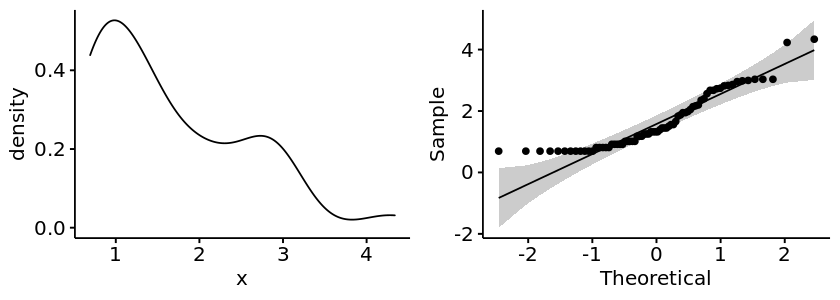

In [38]:
mydata_agg$nb_teleport_log <- log(mydata_agg$nb_teleportation)

ggdensity(mydata_agg$nb_teleport_log) -> p1
ggqqplot(mydata_agg$nb_teleport_log) -> p2
grid.arrange(p1, p2, ncol = 2)

In [39]:
lillie.test(mydata_agg$nb_teleport_log)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  mydata_agg$nb_teleport_log
D = 0.1535, p-value = 0.0002333


Kolmogorov-Smirnov test is significant : the data is different from the log normal distriubtion => it is not log normally distributed  
We will analyze the nb_teleportation with non-parametrics tests

### nb_teleportation: descriptive stats and plots of the data aggregated by condition

  condition  N nb_teleportation nb_teleportation_norm        sd       se
1         0 12         19.00000              19.00000 14.134804 4.080366
2         1 12          3.00000               3.00000  7.084919 2.045240
3         2 12          3.53125               3.53125  7.124119 2.056556
        ci
1 8.980826
2 4.501543
3 4.526450


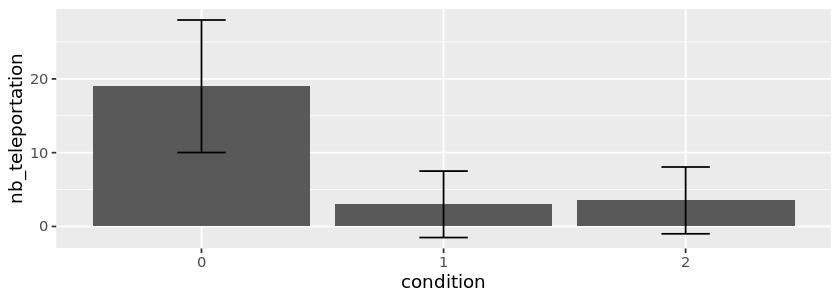

In [40]:
summary_agg5 <- summarySEwithin(mydata_agg2, measurevar="nb_teleportation", withinvars=c("condition"), idvar="id")
print(summary_agg5)

ggplot(summary_agg5, aes(x=condition, y=nb_teleportation)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=nb_teleportation-ci, ymax=nb_teleportation+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9))

### nb_teleportation: Running a Friedman test on data aggregated by condition

In [41]:
friedman.test(nb_teleportation ~ condition | id, data=mydata_agg2 )


	Friedman rank sum test

data:  nb_teleportation and condition and id
Friedman chi-squared = 19.5, df = 2, p-value = 5.829e-05


There is a significant main effect of condition (chi-squared = 19.5, p < 0.0001)

#### Post-hoc analysis

$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_teleportation by condition (0, 1, 2) 
	 stratified by id
maxT = 4.2866, p-value = 5.922e-05
alternative hypothesis: two.sided


$PostHoc.Test
                  
1 - 0 4.905498e-05
2 - 0 6.187155e-03
2 - 1 4.384870e-01


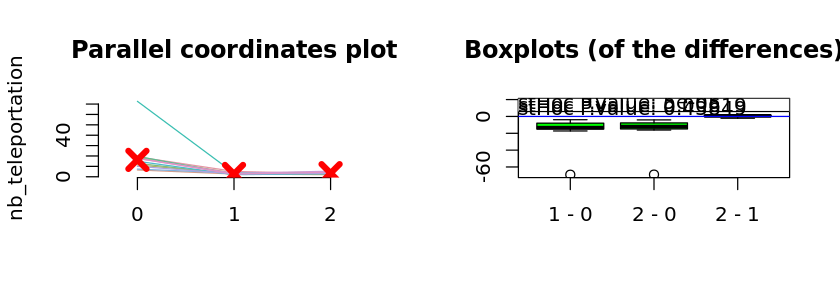

In [42]:
friedman.test.with.post.hoc(nb_teleportation ~ condition | id, data=mydata_agg2)

C0 is significantly different than C1 (p < 0.0001)  
C0 is significantly different than C2 (p < 0.0062)  
No significant difference between C1 and C2.

### nb_teleportation: descriptive stats and plots of the whole data

In [43]:
summary_agg4 <- summarySEwithin(mydata_agg, measurevar="nb_teleportation", withinvars=c("condition", "roomT"), idvar="id")
print(summary_agg4)

  condition roomT  N nb_teleportation nb_teleportation_norm        sd       se
1         0     0 12        20.583333             20.583333 13.481597 3.891802
2         0     1 12        17.416667             17.416667 12.123186 3.499662
3         1     0 12         2.666667              2.666667  6.499567 1.876263
4         1     1 12         3.333333              3.333333  6.224680 1.796910
5         2     0 12         2.583333              2.583333  6.684365 1.929610
6         2     1 12         4.479167              4.479167  6.354494 1.834384
        ci
1 8.565798
2 7.702705
3 4.129628
4 3.954973
5 4.247043
6 4.037453


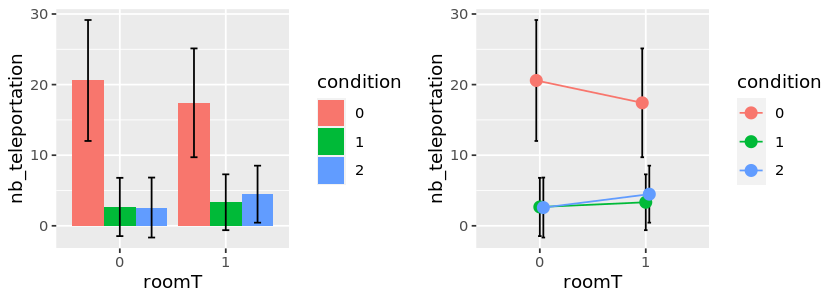

In [44]:
ggplot(summary_agg4, aes(x=roomT, y=nb_teleportation, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=nb_teleportation-ci, ymax=nb_teleportation+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(summary_agg4, aes(x=roomT, y=nb_teleportation, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=nb_teleportation-ci, ymax=nb_teleportation+ci), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

I am not sure about the way to compute confidence intervals. They should not go under 0.  
We probaly have to compute asymetric confidence intervals.

### nb_teleportation: Running a Friedman test on data separated by RoomT

In [45]:
friedman.test(nb_teleportation ~ condition | id, data=roomT0 )
friedman.test(nb_teleportation ~ condition | id, data=roomT1 )


	Friedman rank sum test

data:  nb_teleportation and condition and id
Friedman chi-squared = 19.244, df = 2, p-value = 6.624e-05



	Friedman rank sum test

data:  nb_teleportation and condition and id
Friedman chi-squared = 19.447, df = 2, p-value = 5.987e-05


In roomT = 0: there is a significant effect of condition (chi-squared = 19.24, p < 0.0001).   
In roomT = 1: there is a significant effect of condition (chi-squared = 19.45, p < 0.0001).

#### Post-hoc analysis

$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_teleportation by condition (0, 1, 2) 
	 stratified by id
maxT = 3.9001, p-value = 0.0003098
alternative hypothesis: two.sided


$PostHoc.Test
                  
1 - 0 0.0002829740
2 - 0 0.0006467155
2 - 1 0.9757970984


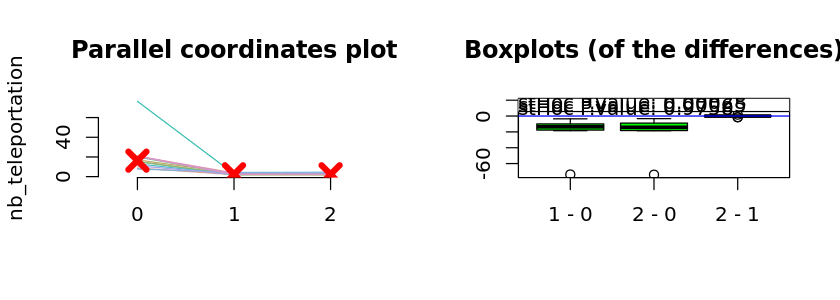

In [46]:
friedman.test.with.post.hoc(nb_teleportation ~ condition | id, data=roomT0)

$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_teleportation by condition (0, 1, 2) 
	 stratified by id
maxT = 4.2288, p-value = 6.714e-05
alternative hypothesis: two.sided


$PostHoc.Test
                  
1 - 0 0.0000696006
2 - 0 0.0038533428
2 - 1 0.5569879400


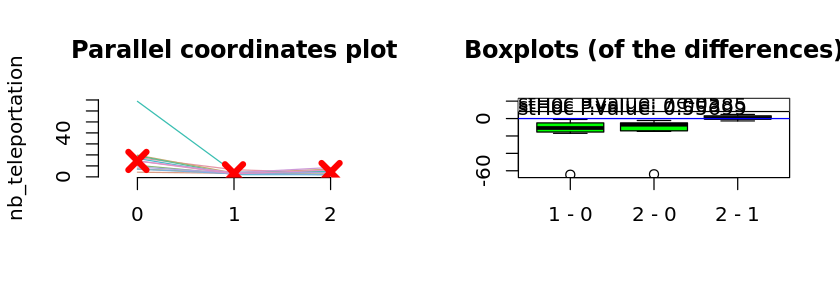

In [47]:
friedman.test.with.post.hoc(nb_teleportation ~ condition | id, data=roomT1)

For both roomT = 0 and roomT = 1:  
C0 is significantly different than C1 (p < 0.0001)  
C0 is significantly different than C2 (p < 0.0062)  
No significant difference between C1 and C2.  
=> Probably not interaction effect (only the main interaction effect on condition)

---

## Analize of Walking

###  Walking: Checking the distribution

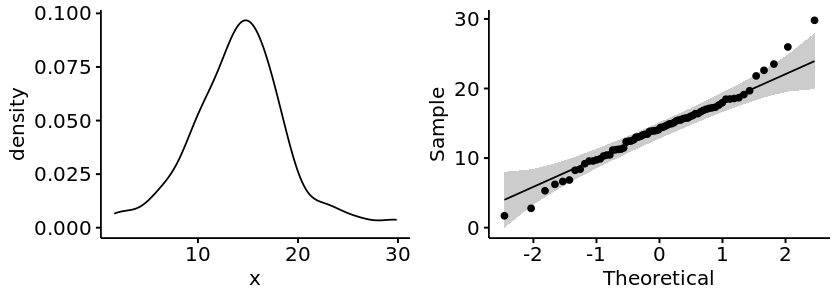

In [48]:
ggdensity(mydata_agg$walking) -> p1
ggqqplot(mydata_agg$walking) -> p2
grid.arrange(p1, p2, ncol = 2)

In [49]:
shapiro.test(mydata_agg$walking)


	Shapiro-Wilk normality test

data:  mydata_agg$walking
W = 0.9759, p-value = 0.1816


Shapriro test is not significant : the data seems normally distributed

### Walking: descriptive stats and plots of the data

In [50]:
summary_agg6 <- summarySEwithin(mydata_agg, 
                                   measurevar="walking", 
                                   withinvars=c("condition", "roomT"), 
                                   idvar="id")
print(summary_agg6)

  condition roomT  N  walking walking_norm       sd        se       ci
1         0     0 12 13.68263     13.68263 3.999368 1.1545182 2.541077
2         0     1 12 12.54952     12.54952 6.627022 1.9130565 4.210609
3         1     0 12 14.91005     14.91005 3.056102 0.8822207 1.941755
4         1     1 12 13.76130     13.76130 2.450013 0.7072579 1.556664
5         2     0 12 14.93641     14.93641 3.494809 1.0088644 2.220495
6         2     1 12 14.84418     14.84418 3.536442 1.0208830 2.246948


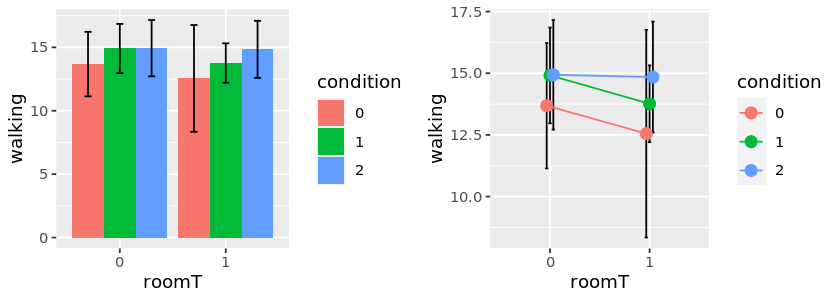

In [51]:
ggplot(summary_agg6, aes(x=roomT, y=walking, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=walking-ci, ymax=walking+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(summary_agg6, aes(x=roomT, y=walking, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=walking-ci, ymax=walking+ci), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

### Walking: Running a Two-way repeated measure Anova - Solution 1

In [52]:
aov.ez2 <- ezANOVA(data=mydata_agg,dv=.(walking), wid=.(id), within =.(condition,roomT), detailed=TRUE)
aov.ez2

$ANOVA
           Effect DFn DFd         SSn      SSd           F            p p<.05
1     (Intercept)   1  11 14342.79232 680.9070 231.7067004 9.763253e-09     *
2       condition   2  22    39.54312 607.0748   0.7165086 4.995042e-01      
3           roomT   1  11    11.27261 153.5527   0.8075317 3.880983e-01      
4 condition:roomT   2  22     4.39989 155.8082   0.3106306 7.361470e-01      
          ges
1 0.899791142
2 0.024157532
3 0.007007646
4 0.002746939

$`Mauchly's Test for Sphericity`
           Effect         W            p p<.05
2       condition 0.2310482 0.0006584353     *
4 condition:roomT 0.5642655 0.0572028248      

$`Sphericity Corrections`
           Effect       GGe     p[GG] p[GG]<.05       HFe     p[HF] p[HF]<.05
2       condition 0.5653065 0.4302246           0.5860221 0.4345933          
4 condition:roomT 0.6965076 0.6593860           0.7659106 0.6797188

Mauchly's Test results are significant for condition: p = 0.0007, indicating that sphericity is violtaed and that the corrected p-value (p\[GG\]) must be used (Greenhouse-Geisser correction).  
=> No significant effects detected.

---

## Analize of Rotation

###  Rot: Checking the normal distribution

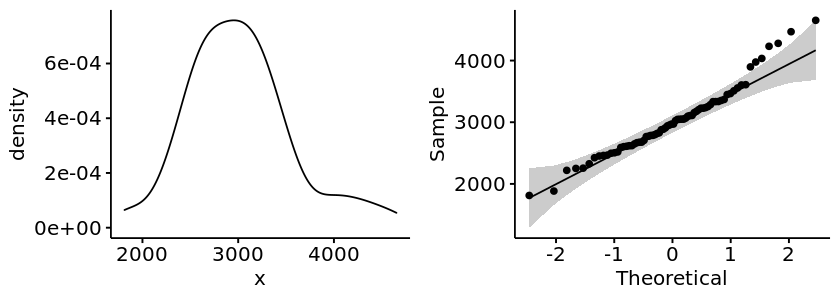

In [53]:
ggdensity(mydata_agg$rot) -> p1
ggqqplot(mydata_agg$rot) -> p2
grid.arrange(p1, p2, ncol = 2)

In [54]:
shapiro.test(mydata_agg$rot)


	Shapiro-Wilk normality test

data:  mydata_agg$rot
W = 0.96379, p-value = 0.03628


Shapriro test is significant : the data is different from the normal distriubtion => it is not normally distributed

#### Do an log transform and check the lognormal distribution

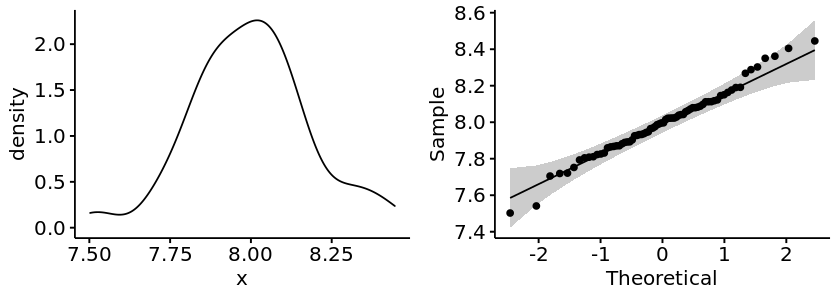

In [55]:
mydata_agg$rot_log <- log(mydata_agg$rot)

ggdensity(mydata_agg$rot_log) -> p1
ggqqplot(mydata_agg$rot_log) -> p2
grid.arrange(p1, p2, ncol = 2)

In [56]:
lillie.test(mydata_agg$rot_log)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  mydata_agg$rot_log
D = 0.063703, p-value = 0.6663


Kolmogorov-Smirnov test is not significant : we can assume that the data follow a lognormal distribution.  
We will analyze the TCT with a lognormal distribution

### Rot: descriptive stats and plots of the aggregated data

In [57]:
summary_agg7 <- summarySEwithin(mydata_agg, 
                                   measurevar="rot_log", 
                                   withinvars=c("condition", "roomT"), 
                                   idvar="id")

In [58]:
summary_agg7$rot <- exp(summary_agg7$rot_log)
summary_agg7$cup <- exp(summary_agg7$rot_log + summary_agg7$ci)
summary_agg7$clo <- exp(summary_agg7$rot_log - summary_agg7$ci)

print(summary_agg8)

  condition roomT  N nb_warning_log nb_warning_log_norm        sd        se
1         0     0 12      1.2658195           1.2658195 0.3992607 0.1152566
2         0     1 12      1.2132286           1.2132286 0.5356591 0.1546315
3         1     0 12      0.6942897           0.6942897 0.5526586 0.1595388
4         1     1 12      0.8414589           0.8414589 0.4319965 0.1247066
5         2     0 12      0.2429538           0.2429538 0.4436008 0.1280565
6         2     1 12      0.7786789           0.7786789 0.5501999 0.1588290
         ci nb_warning      cup      clo
1 0.2536781   3.545997 4.569929 2.751487
2 0.3403416   3.364329 4.728321 2.393812
3 0.3511425   2.002286 2.844628 1.409376
4 0.2744775   2.319749 3.052425 1.762937
5 0.2818505   1.275010 1.690128 0.961850
6 0.3495804   2.178592 3.090272 1.535872


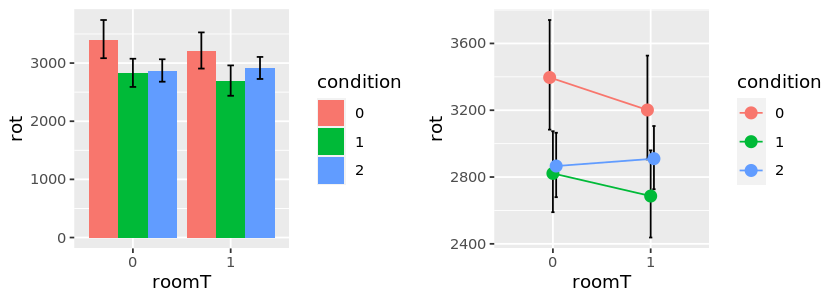

In [59]:
ggplot(summary_agg7, aes(x=roomT, y=rot, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=clo, ymax=cup),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(summary_agg7, aes(x=roomT, y=rot, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=clo, ymax=cup), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

### Rot: Running a Two-way repeated measure Anova

In [60]:
aov.ez3 <- ezANOVA(data=mydata_agg,dv=.(rot_log), wid=.(id), within =.(condition,roomT), detailed=TRUE)
aov.ez3

$ANOVA
           Effect DFn DFd          SSn       SSd            F            p
1     (Intercept)   1  11 4.603973e+03 0.8857189 5.717808e+04 8.587367e-22
2       condition   2  22 4.194396e-01 0.5378584 8.578160e+00 1.761282e-03
3           roomT   1  11 1.726470e-02 0.2364971 8.030191e-01 3.893819e-01
4 condition:roomT   2  22 1.955732e-02 0.2300034 9.353364e-01 4.075100e-01
  p<.05         ges
1     * 0.999589637
2     * 0.181613522
3       0.009051704
4       0.010241390

$`Mauchly's Test for Sphericity`
           Effect         W         p p<.05
2       condition 0.9292192 0.6927728      
4 condition:roomT 0.9748480 0.8804092      

$`Sphericity Corrections`
           Effect       GGe      p[GG] p[GG]<.05      HFe       p[HF] p[HF]<.05
2       condition 0.9338979 0.00230282         * 1.117668 0.001761282         *
4 condition:roomT 0.9754651 0.40575587           1.183059 0.407509976

Mauchly's Test results are not significant (condition: p = 0.69, condition X roomT: p = 0.88),  
indicating that sphericity is not violated and that an uncorrected test can be used.

Main effect of condition (F(2,22) = 8.58, p = 0.0018)  
No effect of roomT and no interaction effect. 

### Rot: post-hoc analysis

#### Post-hoc for the main effect of condition

In [61]:
pairwise.t.test(mydata_agg$rot_log,mydata_agg$condition,paired=TRUE,p.adjust.method="bonferroni")


	Pairwise comparisons using paired t tests 

data:  mydata_agg$rot_log and mydata_agg$condition 

  0      1     
1 0.0004 -     
2 0.0076 0.5378

P value adjustment method: bonferroni 

C0 is significantly different than C1 (p = 0.0004)  
C0 is significantly different than C2 (p = 0.0076)  
No differences between C1 and C2